# Introduction to Exploritary Data Analysis
Analyzing a dataset typically involves several key steps :
1. [Step 0: Imports and Reading data](#1)
2. [Step 1: data Understanding](#2)
3. [Step 2: data Prep](#3)
4. [Step 3: Feature Understanding](#4)
5. [Step 4: Feature Relationships](#5)
6. [Step 5: Analyse Hypothese](#6)
7. [Step 6: data Cleaning](#7)
8. [Step 7: Model Building (If Applicable):](#8)
9. [Step 8: Model Evaluation:](#9)
10. [Step 9: Feature Engineering:](#10)
11. [Step 10: Feature Scalling:](#11)


# [Step 0: Imports and Reading data]()<a id="1"></a> <br>

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import scipy.stats as sc
import statistics as st
pd.set_option('display.max_row',111)
pd.set_option('display.max_column',111)
# plt.style.use('dark_background')
plt.style.use('ggplot')

df = pd.read_csv('D:\Paractical data scientist\Rain-Prediction\weatherAUS.csv')
df = df.copy()

# [Step 1: data Understanding]()<a id="2"></a> <br>
- Analysis the shape : We'll just focus on the form of data : Ndr of rows & columns : (150, 5)

In [43]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [44]:
df.drop_duplicates(inplace = True)

In [45]:
df.shape

(145460, 23)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

<Axes: ylabel='proportion'>

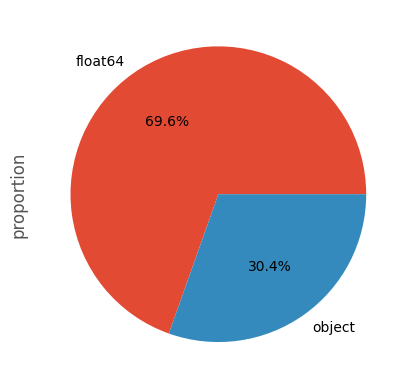

In [47]:
plt.figure()
df.dtypes.value_counts(normalize=True).plot.pie(autopct='%1.1f%%')

# [Step 2: data Preperation]()<a id="3"></a> <br>

- Dropping irrelevant columns and rows

In [48]:
for col in df.select_dtypes('object'):
    if len(df[col].unique()) == 1 :
        print("we drop "+col+" : Observing Unique Values")
        df.drop([col], axis=1, inplace=True)

<Axes: >

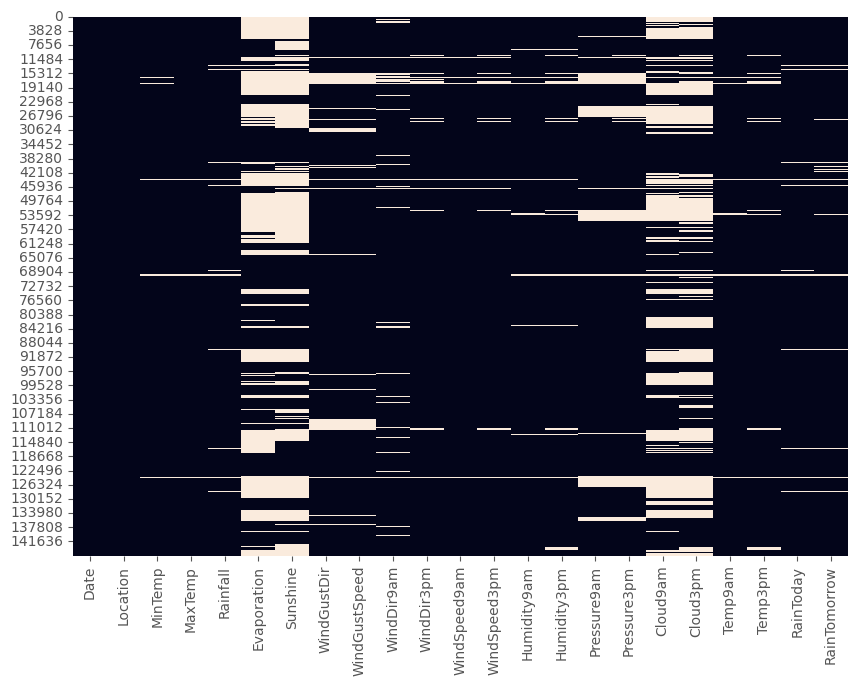

In [49]:
plt.figure(figsize=(10,7))
sns.heatmap(df.isna(), cbar=False) 

- 
    - Analyse val 0 : ( % of null(emptying) for each column with sum in axis 0 )
        - If 15% of the data is missing, we should delete the corresponding variable. According to this, we should delete...

In [50]:
df.isna().sum()                                          
total = df.isna().sum().sort_values()
percent = (df.isna().sum()/df.isna().count()).sort_values()                 
Data_nan = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
Data_nan.head(50)

,Total,Percent
Date,0,0.000000
Location,0,0.000000
MaxTemp,1261,0.008669
MinTemp,1485,0.010209
Temp9am,1767,0.012148
WindSpeed9am,1767,0.012148
Humidity9am,2654,0.018246
WindSpeed3pm,3062,0.021050
Rainfall,3261,0.022419
RainToday,3261,0.022419


Index(['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'], dtype='object')


<Axes: >

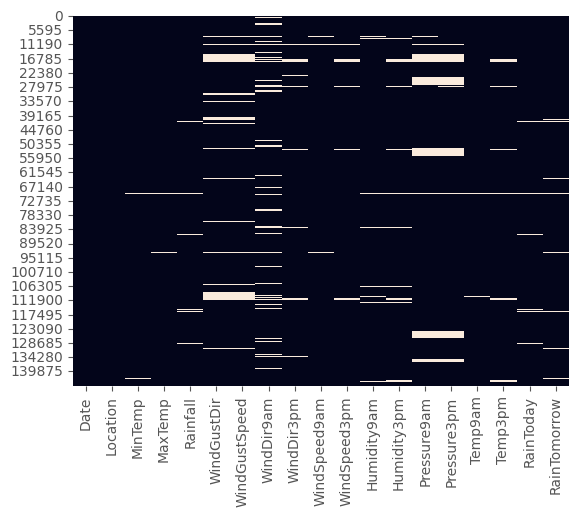

In [51]:
# Save column of val_nan < 15%
index_na=(df.isna().sum()/df.shape[0]) > 0.15
group_columns = df.columns[index_na]
print(group_columns)
df.drop(group_columns, axis=1, inplace=True)
sns.heatmap(df.isna(), cbar=False) 

(145460, 19)

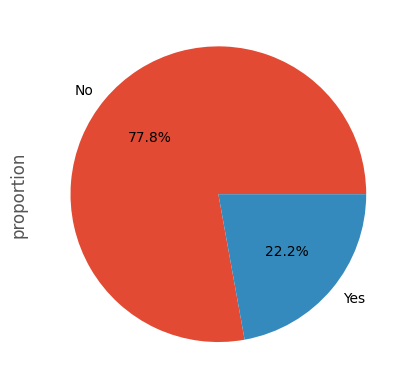

In [52]:
# Impacte of drop nan in rows: (calculate nbr of rows remaining after drop) / (classif equilibre or not)
df.dropna(axis = 0).count()                                     
df.dropna()['RainTomorrow'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%')
df.shape

In [53]:
df.isna().sum()                                          
total = df.isna().sum().sort_values()
percent = (df.isna().sum()/df.isna().count()).sort_values()                 
Data_nan = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
Data_nan.head(50)

,Total,Percent
Date,0,0.000000
Location,0,0.000000
MaxTemp,1261,0.008669
MinTemp,1485,0.010209
Temp9am,1767,0.012148
WindSpeed9am,1767,0.012148
Humidity9am,2654,0.018246
WindSpeed3pm,3062,0.021050
RainToday,3261,0.022419
Rainfall,3261,0.022419


In [54]:
df['Pressure3pm'].fillna(df['Pressure3pm'].mean(), inplace = True)
df['Pressure3pm'].isna().sum()  

0

In [55]:
df['Pressure9am'].fillna(df['Pressure9am'].mean(), inplace = True)
df['Pressure9am'].isna().sum()  

0

In [56]:
df.shape

(145460, 19)

<Axes: >

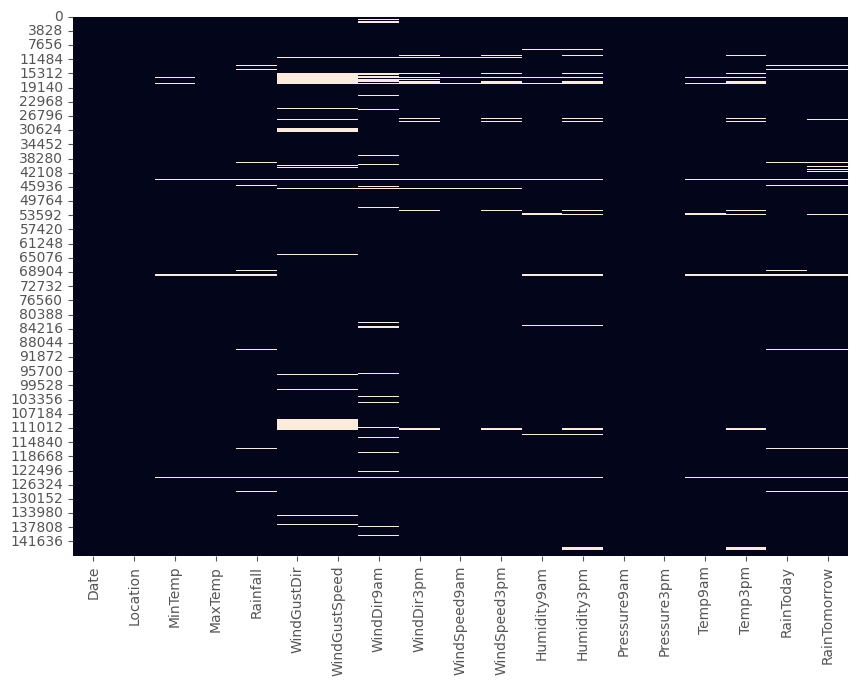

In [57]:
plt.figure(figsize=(10,7))
sns.heatmap(df.isna(), cbar=False) 

<Axes: >

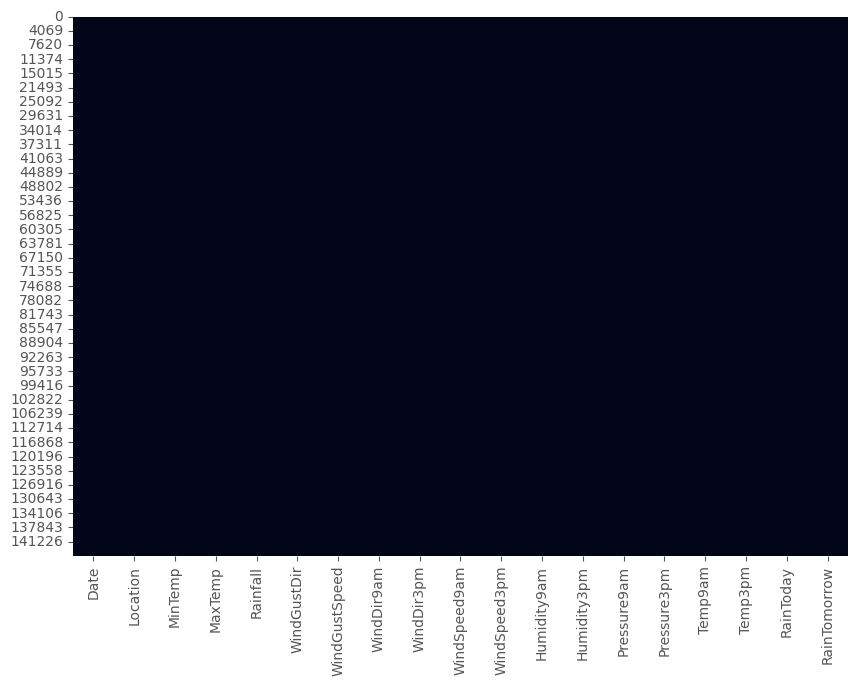

In [58]:
df = df.dropna()
plt.figure(figsize=(10,7))
sns.heatmap(df.isna(), cbar=False) 

In [59]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date'].head()

0   2008-12-01
1   2008-12-02
2   2008-12-03
3   2008-12-04
4   2008-12-05
Name: Date, dtype: datetime64[ns]

In [60]:
for col in df.select_dtypes('object'):
    print(df[col].value_counts())
    print("===========================")

Location
Darwin              3118
Hobart              3090
Perth               3038
Brisbane            3020
SydneyAirport       2937
MelbourneAirport    2934
PerthAirport        2924
Mildura             2900
Cairns              2899
Woomera             2891
MountGambier        2886
Townsville          2884
Ballarat            2876
NorfolkIsland       2867
SalmonGums          2862
Portland            2832
GoldCoast           2821
Cobar               2820
Wollongong          2815
WaggaWagga          2800
Nuriootpa           2793
NorahHead           2785
Sale                2751
AliceSprings        2744
Adelaide            2743
Watsonia            2735
Canberra            2731
Bendigo             2722
Moree               2629
CoffsHarbour        2552
Walpole             2502
Launceston          2500
PearceRAAF          2460
BadgerysCreek       2442
Albury              2440
Witchcliffe         2437
Penrith             2324
Tuggeranong         2316
Dartmoor            2295
MountGinini     

# [Step 3: Feature Understanding]()<a id="4"></a> <br>

- - Analyse target : (reg or classif) / (variables type:'numerical' or 'categorical') / (equilibre or not) classif non equilibre 10% of var1

C:\Users\Farouq MOUSMI\AppData\Local\Temp\ipykernel_14316\3447420745.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 0, 'count')

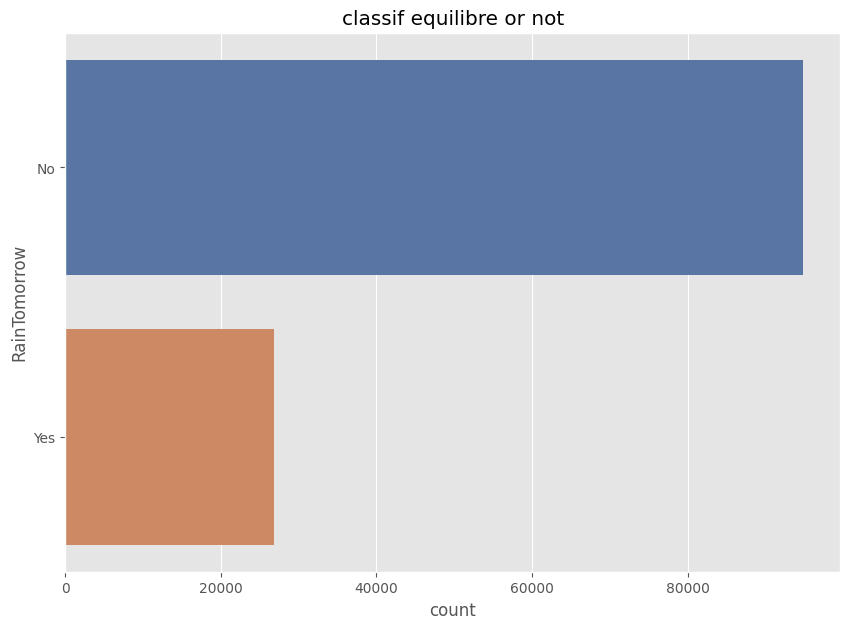

In [61]:
plt.figure(figsize=(10,7))
chains=df['RainTomorrow'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title("classif equilibre or not")
plt.xlabel("count")

- - Histo des variables columns number : (distibution normale ou gausien symetrique or not) / uniforme / multi modale

c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



<Figure size 600x500 with 0 Axes>

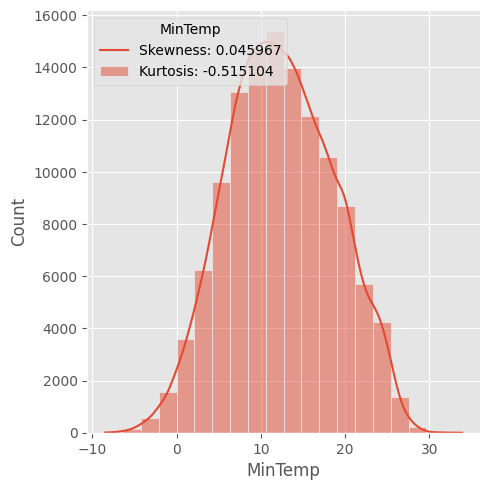

c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



<Figure size 600x500 with 0 Axes>

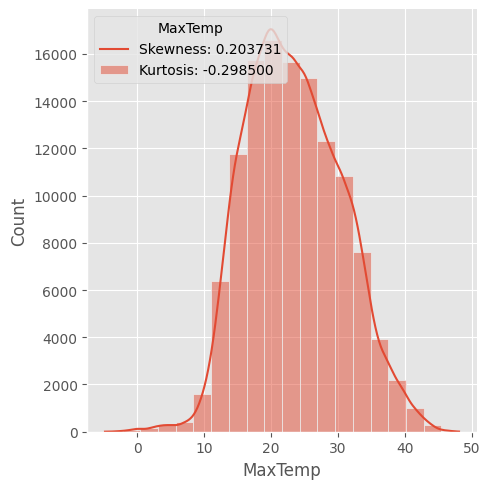

c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



<Figure size 600x500 with 0 Axes>

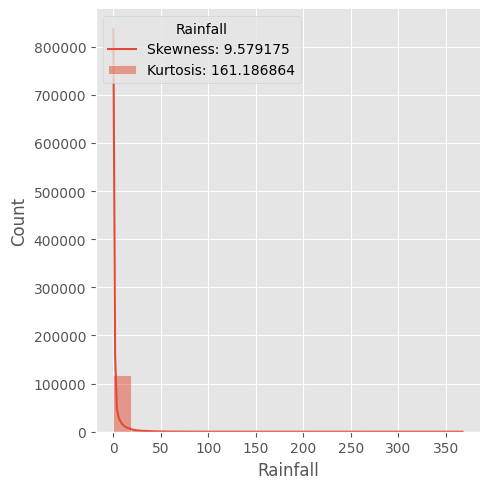

c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



<Figure size 600x500 with 0 Axes>

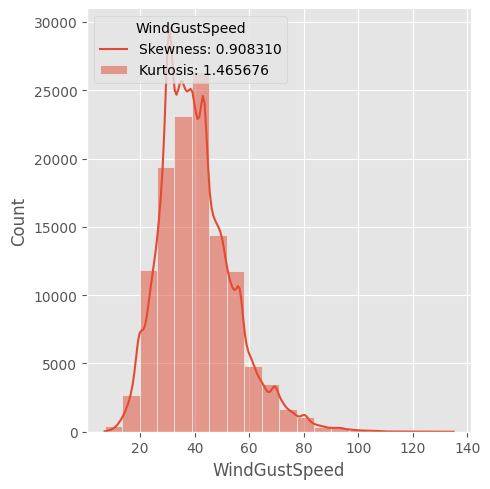

c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



<Figure size 600x500 with 0 Axes>

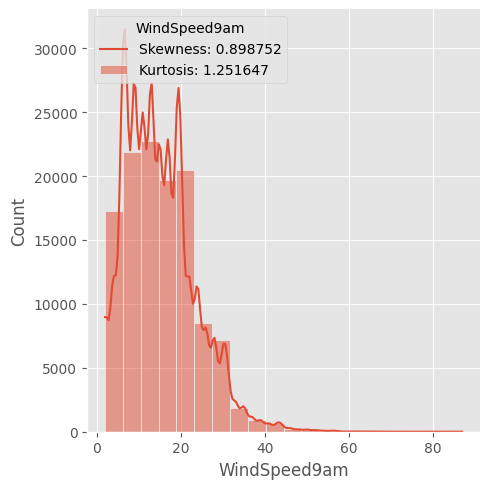

c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



<Figure size 600x500 with 0 Axes>

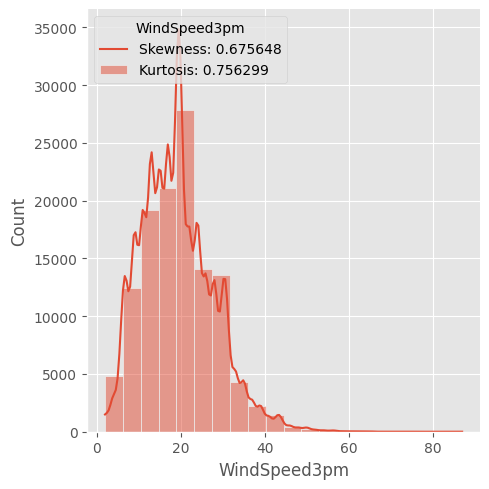

c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



<Figure size 600x500 with 0 Axes>

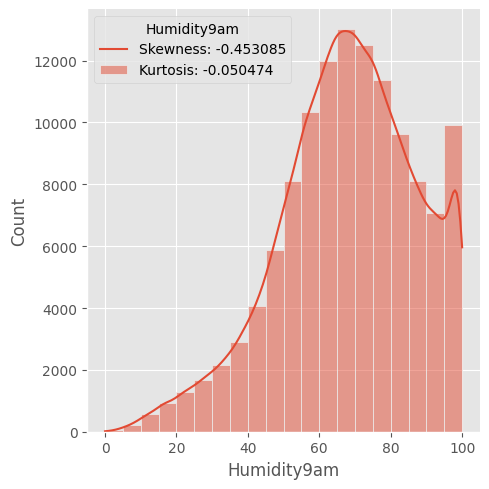

c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



<Figure size 600x500 with 0 Axes>

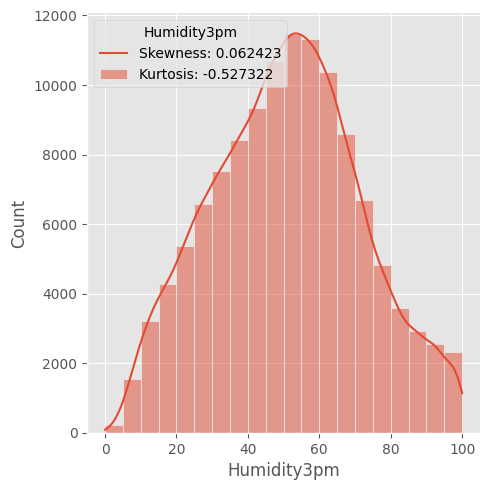

c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



<Figure size 600x500 with 0 Axes>

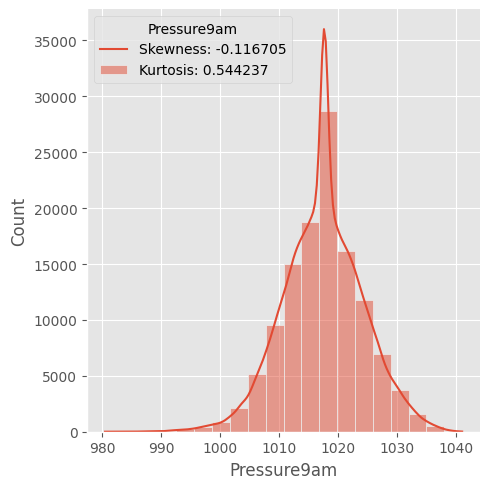

c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



<Figure size 600x500 with 0 Axes>

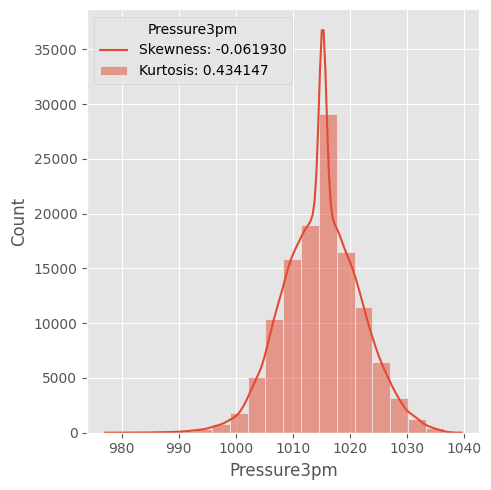

c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



<Figure size 600x500 with 0 Axes>

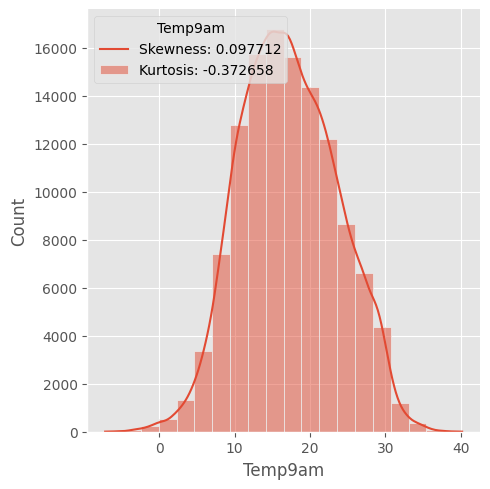

c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



<Figure size 600x500 with 0 Axes>

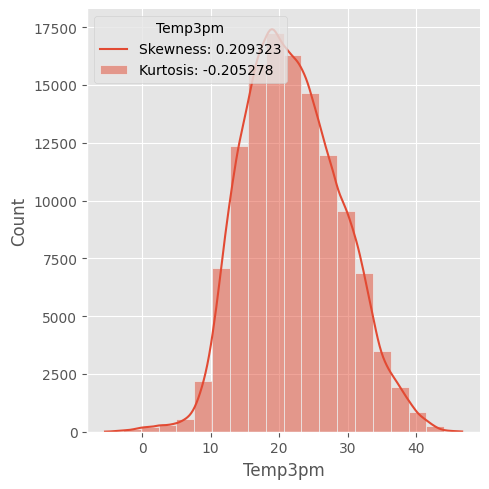

In [62]:
for col in df.select_dtypes(include=['int','float']):
    plt.figure(figsize=(6,5))
    ax = sns.displot(df, x=col,kde=True ,bins=20)
    plt.legend(title=col, loc='upper left', labels=["Skewness: %f" % df[col].skew(),"Kurtosis: %f" % df[col].kurt()])
    plt.show(ax)

- - Histo des variables columns object : (binaire(0,1) or not) / (equilibre or not)

Location------------------------------------------ ['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'NorahHead'
 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums' 'Walpole'
 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine' 'Uluru']


C:\Users\Farouq MOUSMI\AppData\Local\Temp\ipykernel_14316\2772840942.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




WindGustDir--------------------------------------- ['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' 'ENE' 'SSE' 'S' 'NW' 'SE' 'ESE'
 'E' 'SSW']


C:\Users\Farouq MOUSMI\AppData\Local\Temp\ipykernel_14316\2772840942.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




WindDir9am---------------------------------------- ['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' 'SSW' 'N' 'WSW' 'ESE' 'E' 'NW'
 'WNW' 'NNE']


C:\Users\Farouq MOUSMI\AppData\Local\Temp\ipykernel_14316\2772840942.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




WindDir3pm---------------------------------------- ['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' 'NE']


C:\Users\Farouq MOUSMI\AppData\Local\Temp\ipykernel_14316\2772840942.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




RainToday----------------------------------------- ['No' 'Yes']


C:\Users\Farouq MOUSMI\AppData\Local\Temp\ipykernel_14316\2772840942.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




RainTomorrow-------------------------------------- ['No' 'Yes']


C:\Users\Farouq MOUSMI\AppData\Local\Temp\ipykernel_14316\2772840942.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




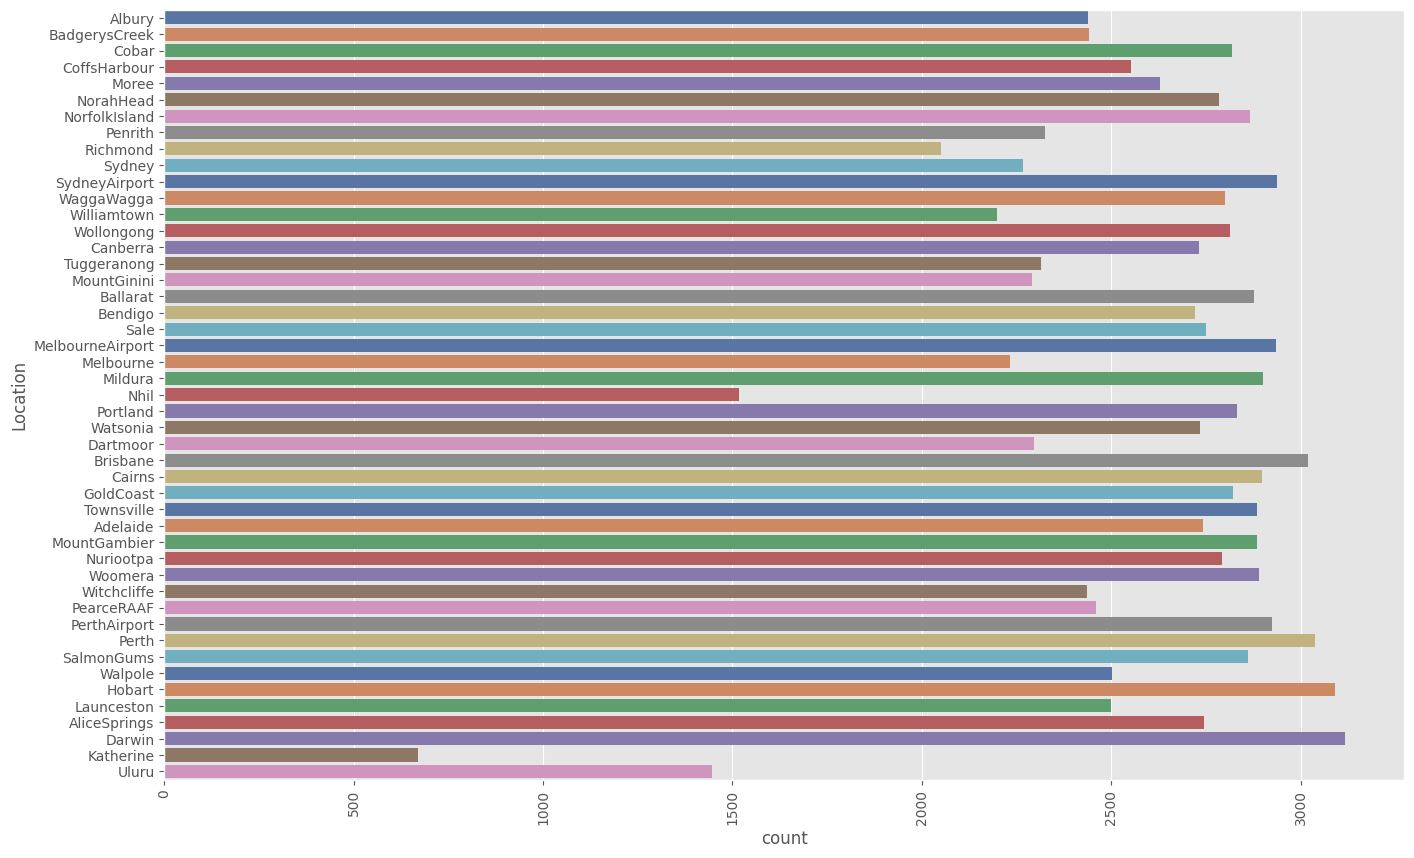

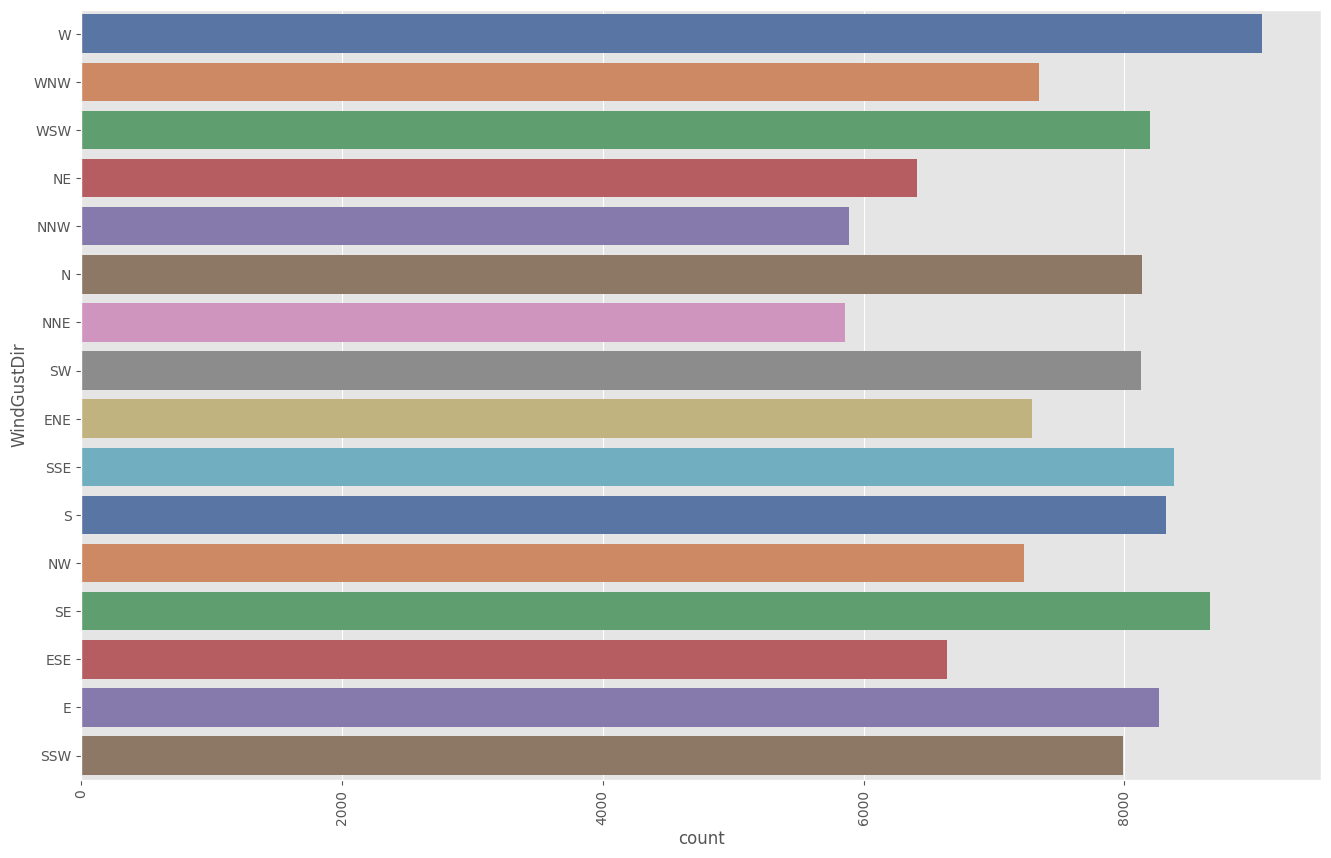

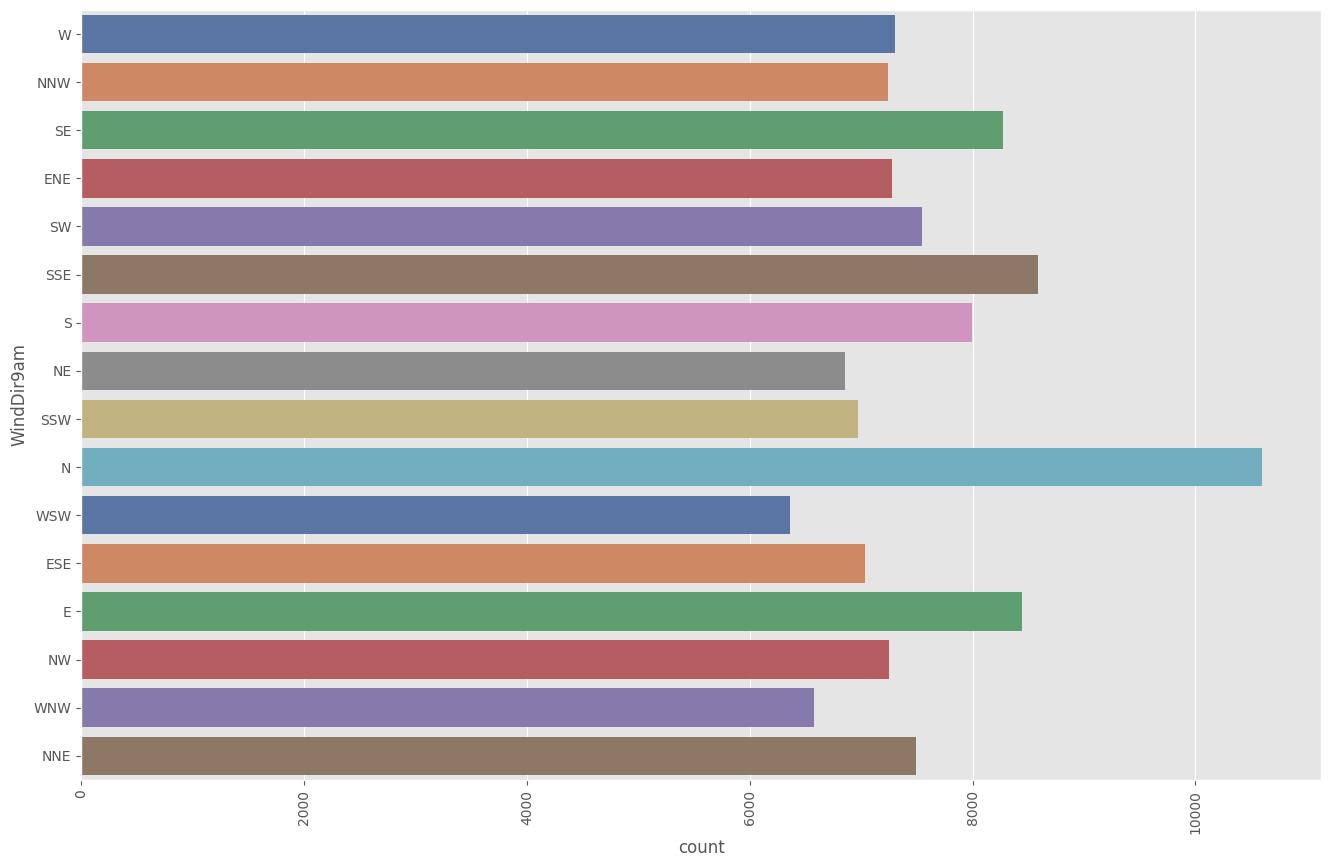

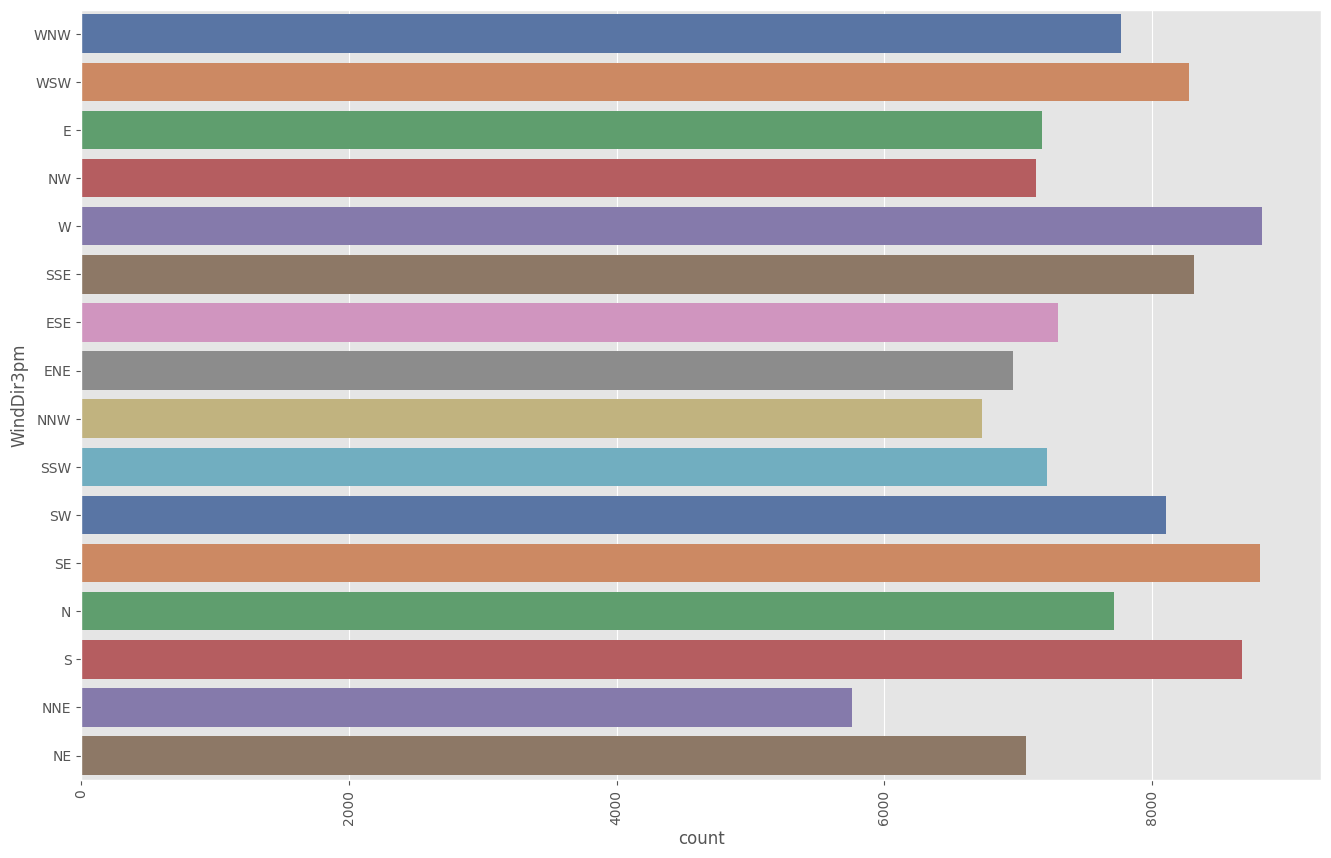

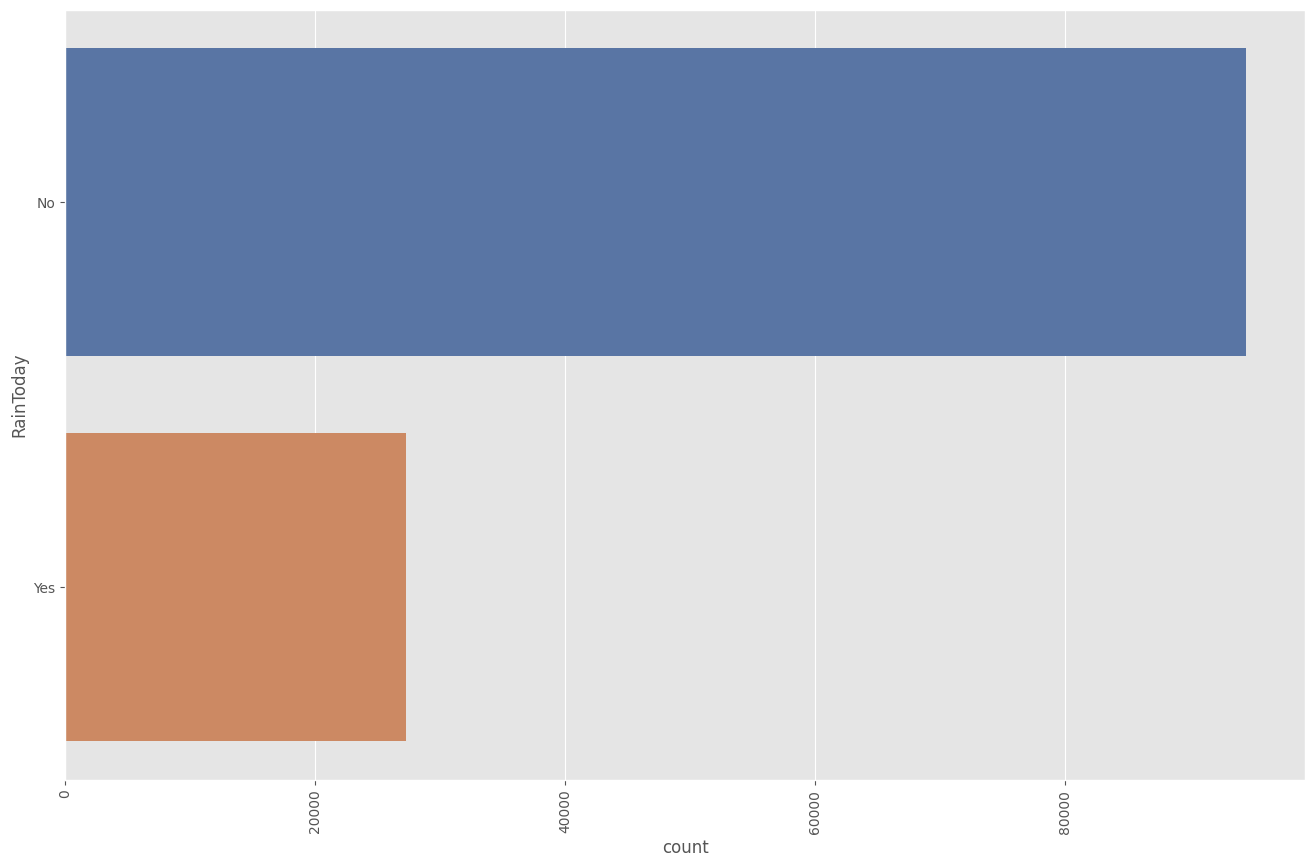

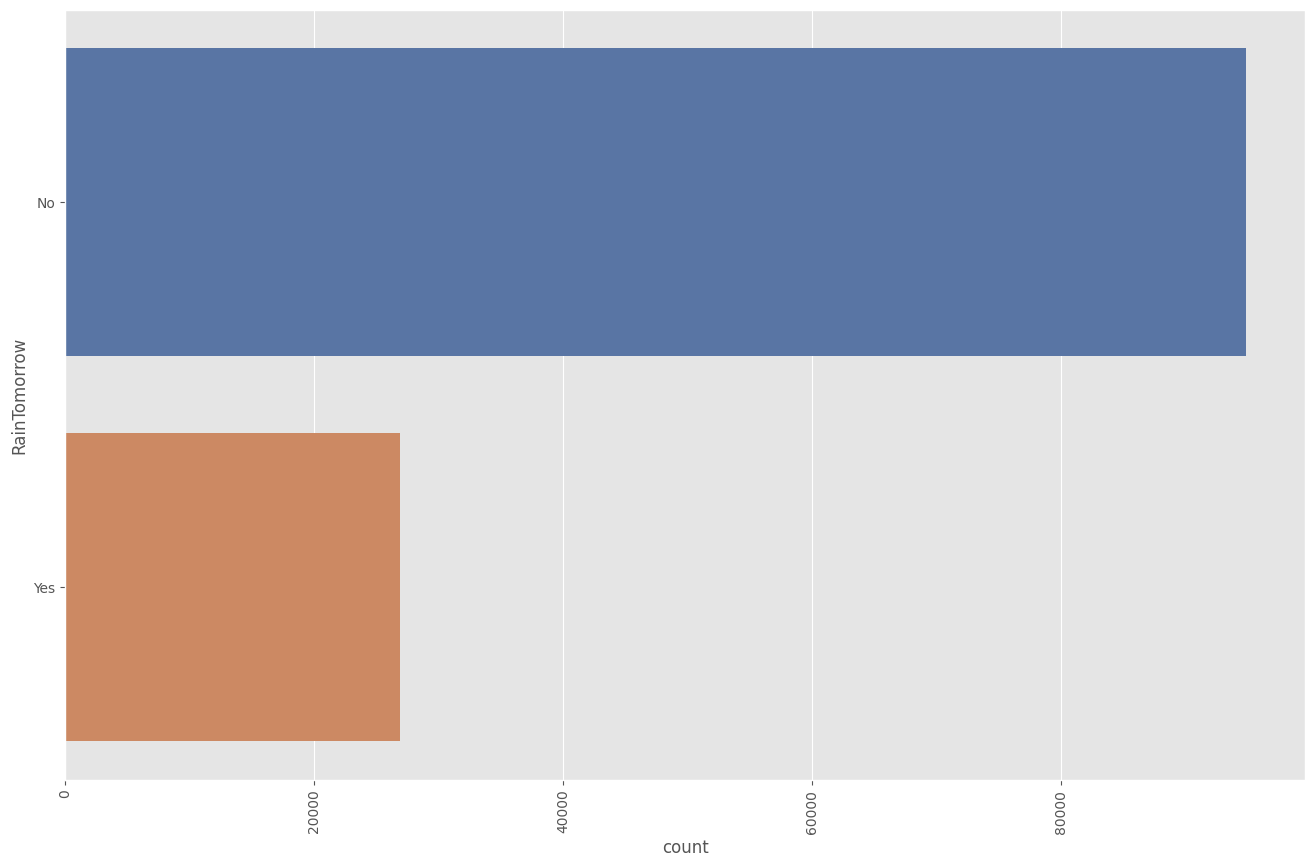

In [63]:
for col in df.select_dtypes('object'):
    print(f'{col :-<50} {df[col].unique()}')
    plt.figure(figsize = (16,10))
    ax = sns.countplot(df[col],palette='deep')
    plt.xticks(rotation=90)
    plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

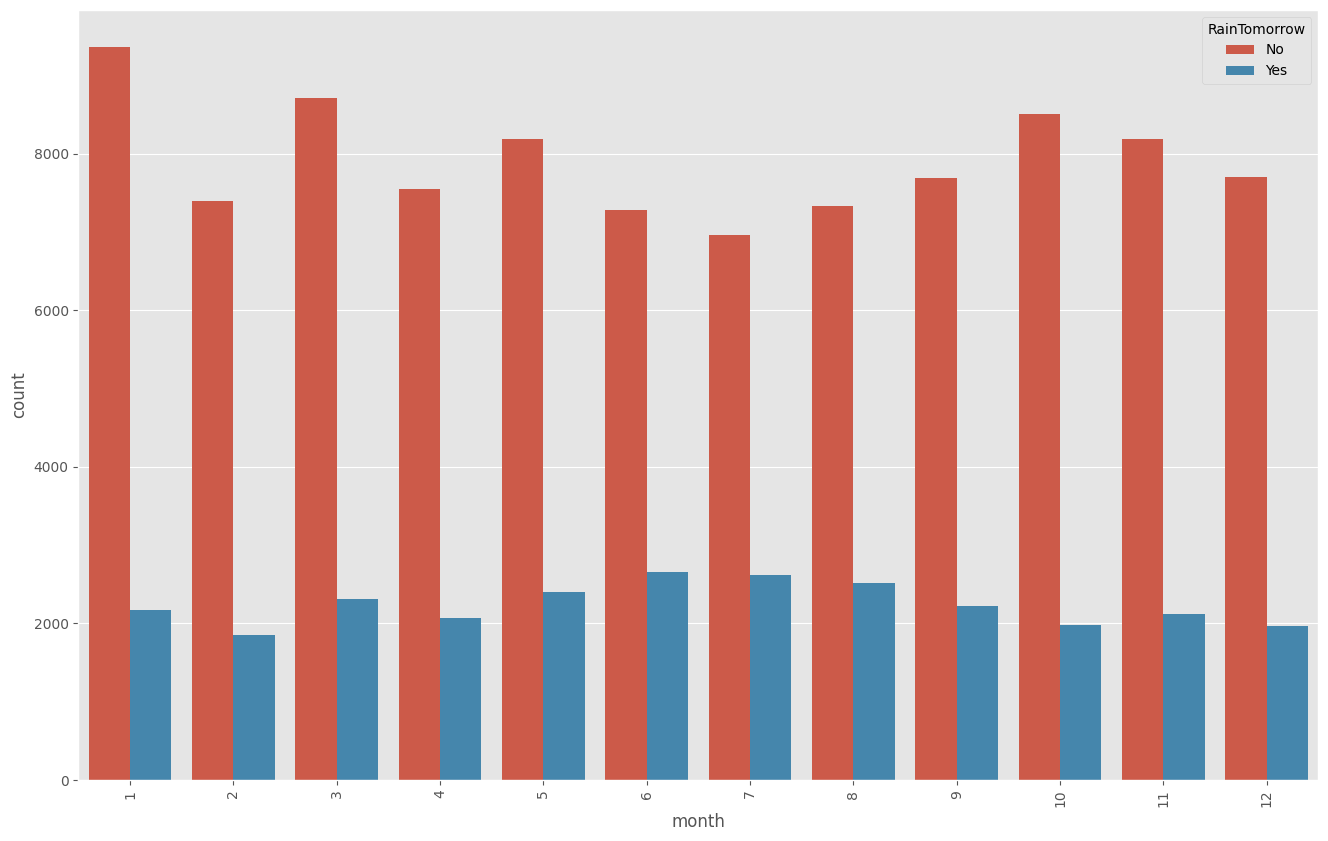

In [70]:
import plotly.express as px
from datetime import date

df['Date'] = pd.to_datetime(df['Date'])
#=========================== month distribution
WIDTH=800
df['month'] = df['Date'].dt.month
plt.figure(figsize = (16,10))
ax = sns.countplot(data=df, x="month",hue=df['RainTomorrow'])  
plt.xticks(rotation=90)
plt.show  

- - Verifie outliers

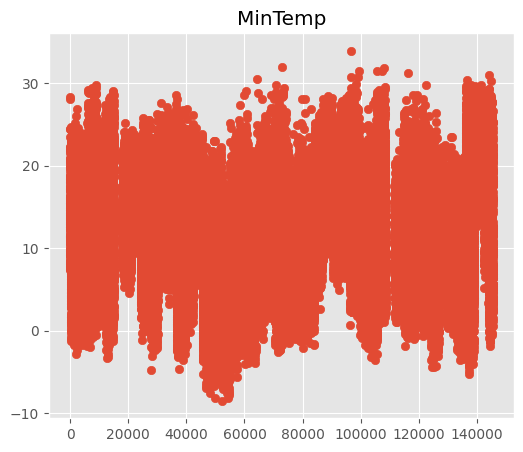

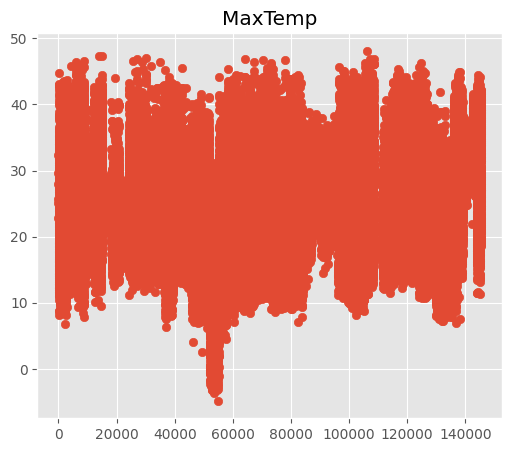

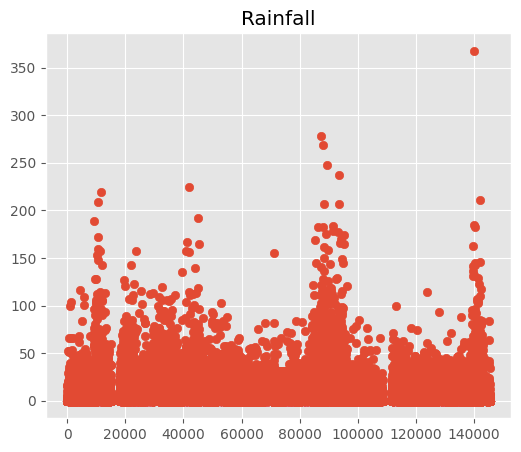

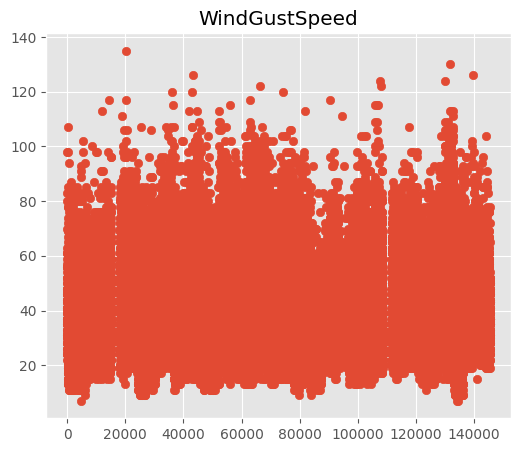

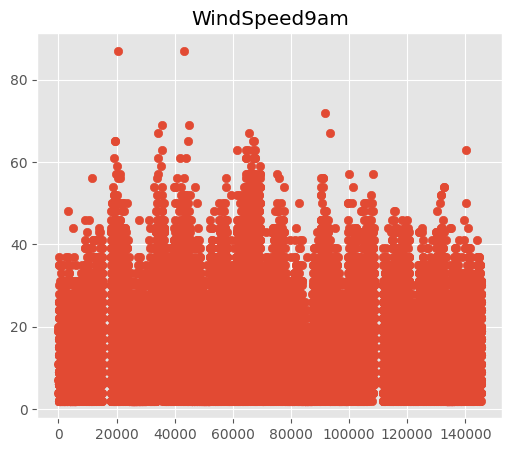

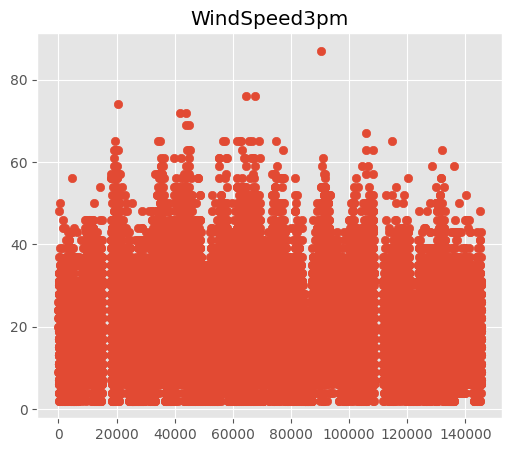

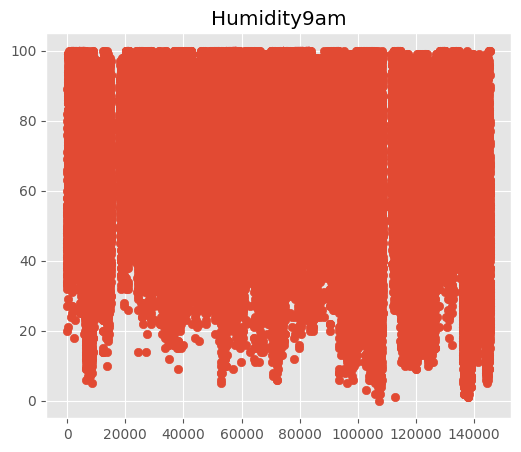

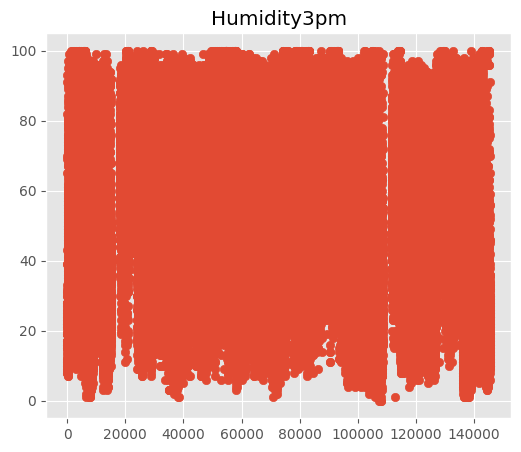

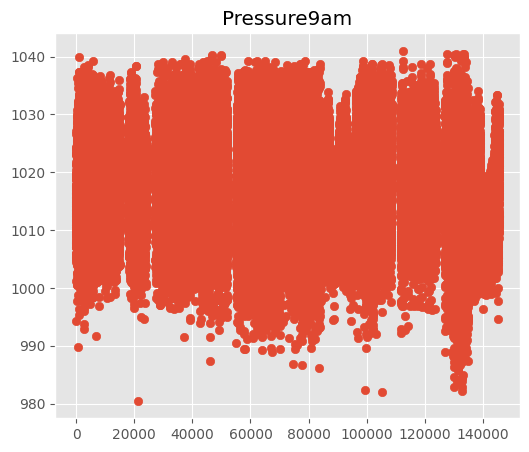

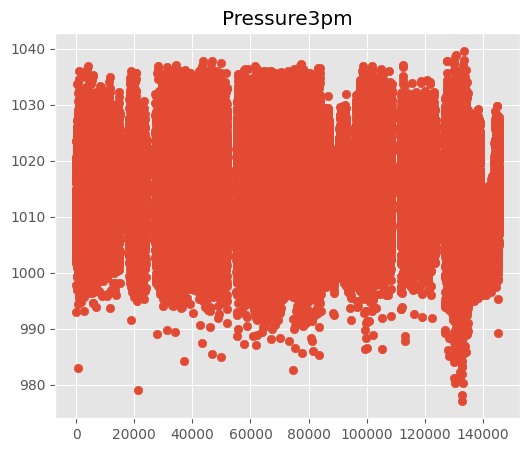

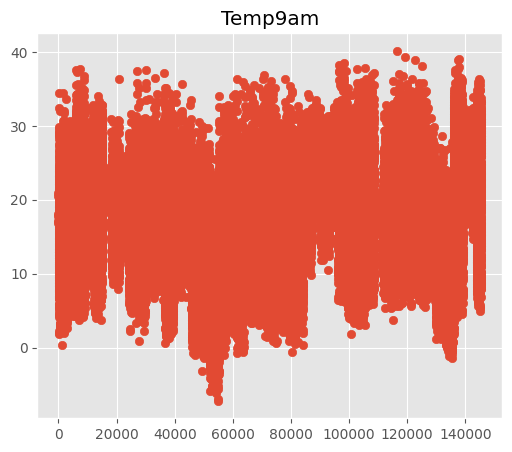

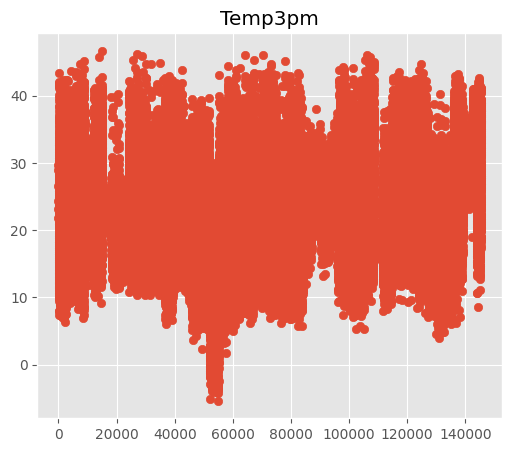

In [38]:
for col in df.select_dtypes(include=['int','float']):
    plt.figure(figsize=(6,5))
    ax = plt.scatter(df.index, df[col])
    plt.title(col)
    plt.show(ax)

# [Step 4: Feature Relationships]()<a id="5"></a> <br>

- - Relation variables/variables : (Taux de corre variables/variables>0.9)

<Axes: >

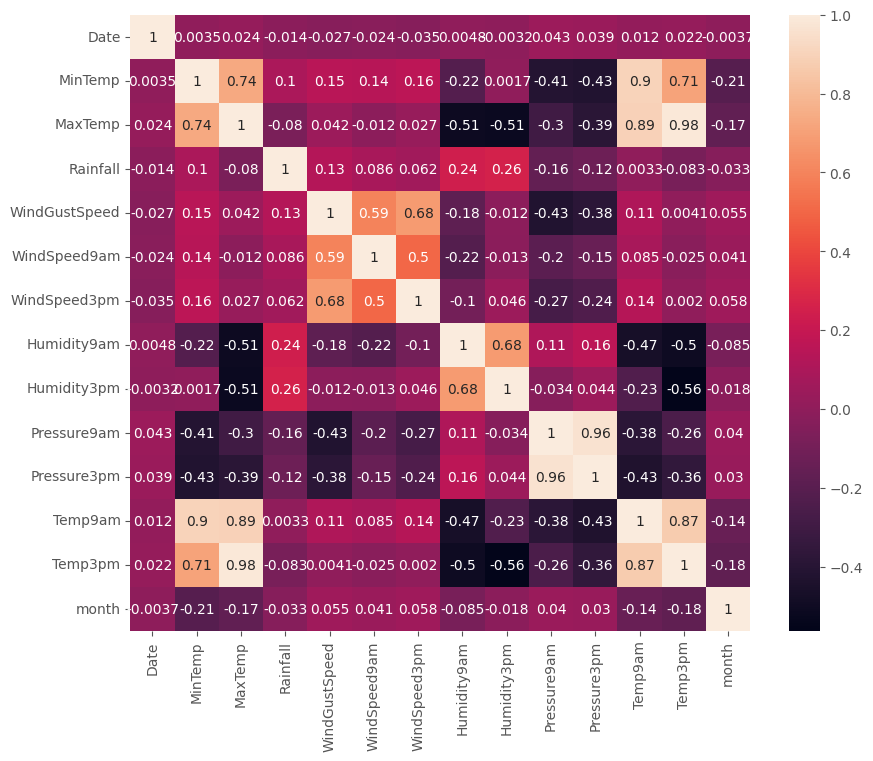

In [77]:
cols = list()
numeric_cols = df.select_dtypes(exclude='object').columns
df_corr = df[numeric_cols].dropna().corr()
plt.figure(figsize=(10,8))
sns.heatmap(df_corr, annot=True )

- - Relation Target/Variables : (Taux corr variables/target >0.9) We ll try to understand how the target and other types variables relate.. 

C:\Users\Farouq MOUSMI\AppData\Local\Temp\ipykernel_14316\3969479845.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Farouq MOUSMI\AppData\Local\Temp\ipykernel_14316\3969479845.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Farouq MOUSMI\AppData\Local\Temp\ipykernel_14316\3969479845.py:6: UserW

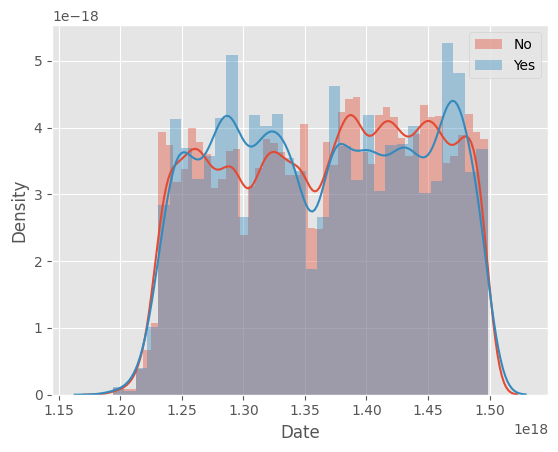

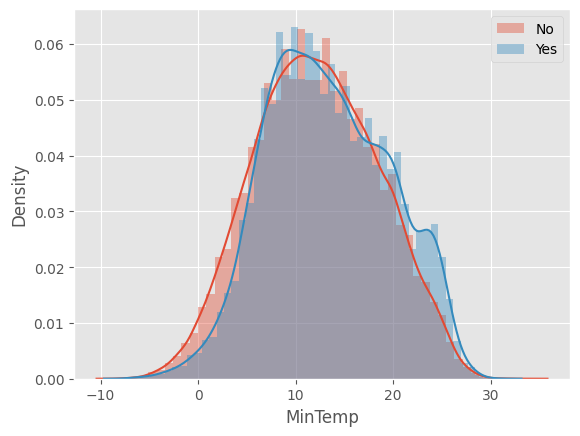

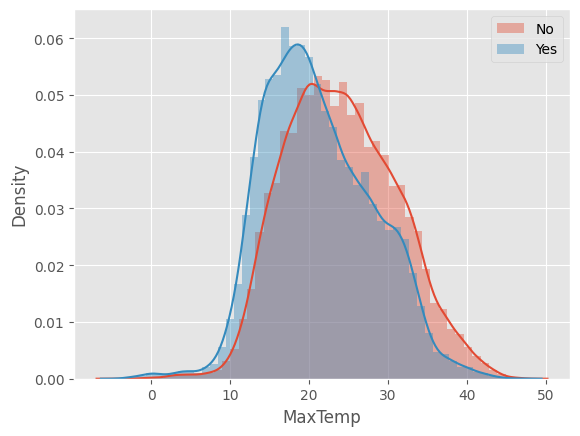

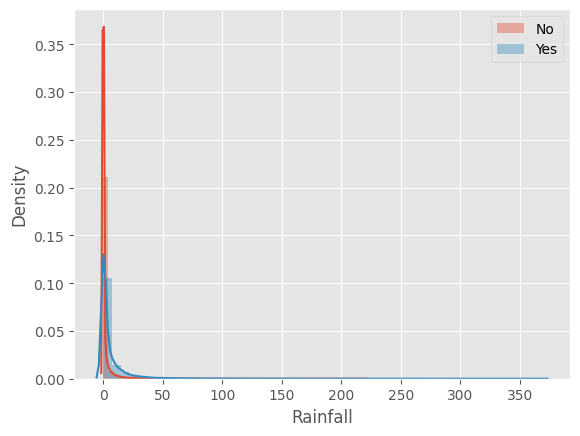

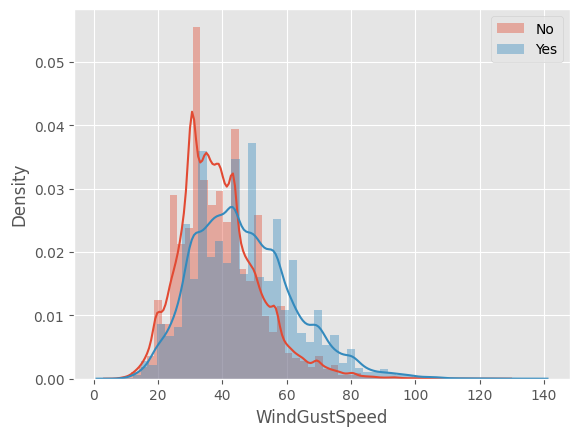

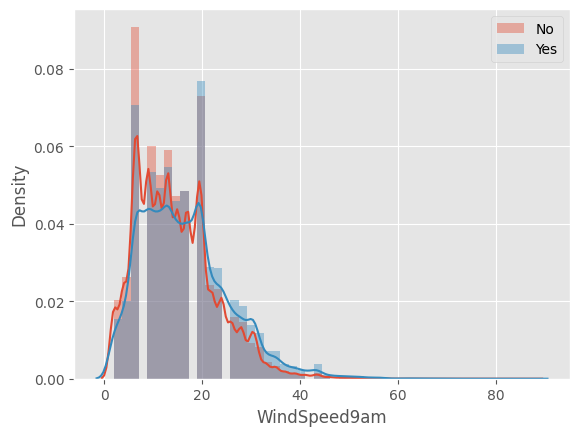

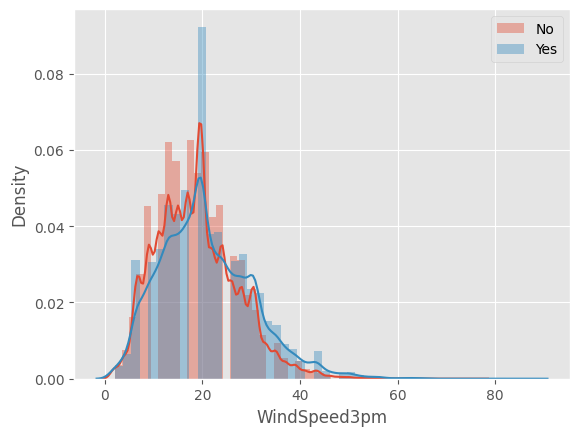

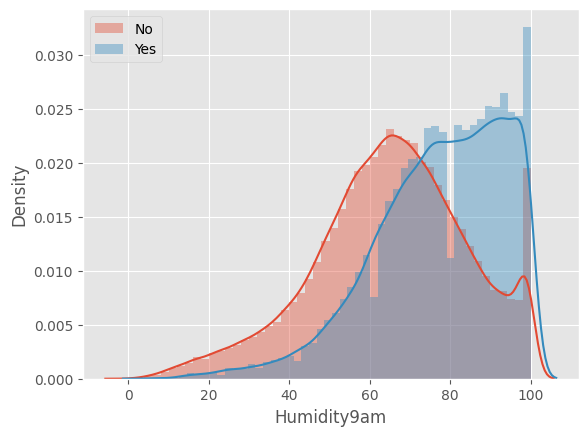

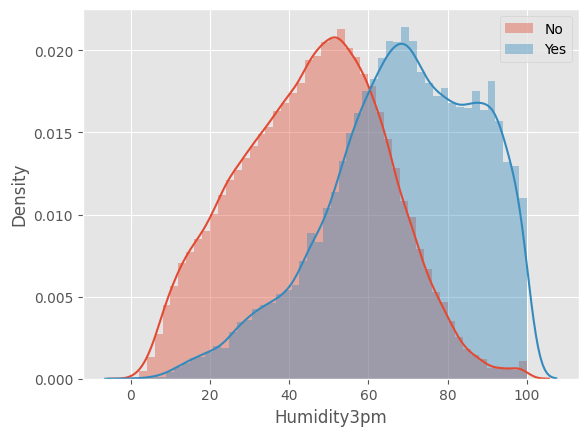

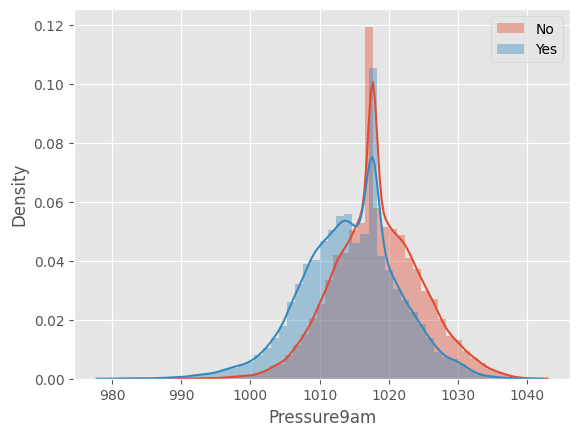

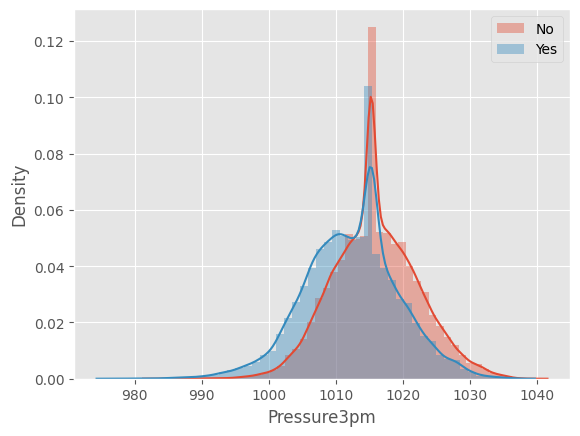

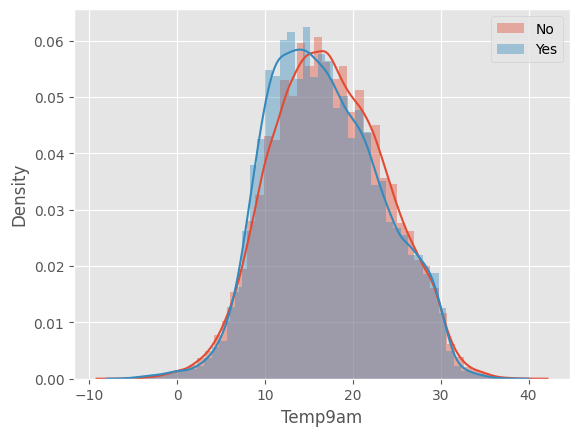

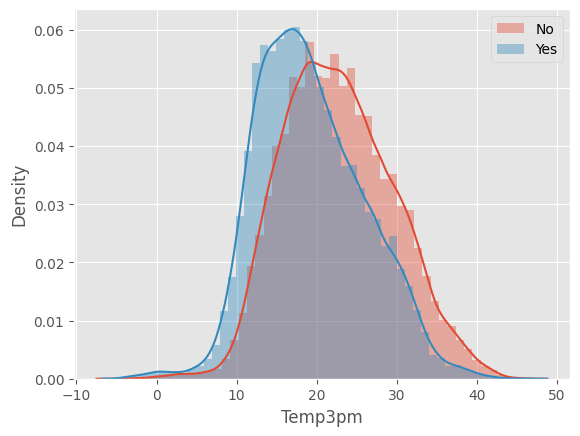

In [79]:
# Display histo object_target/col_float64 (use it only for object target class)
for col in df.select_dtypes(exclude=['object','int']):
    plt.figure()                                 
    for cat in df['RainTomorrow'].unique():
        #Data_A=Data[Data['column_y']==A]
        sns.distplot(df[df['RainTomorrow']==cat][col],kde=True,label=cat)
    plt.legend()

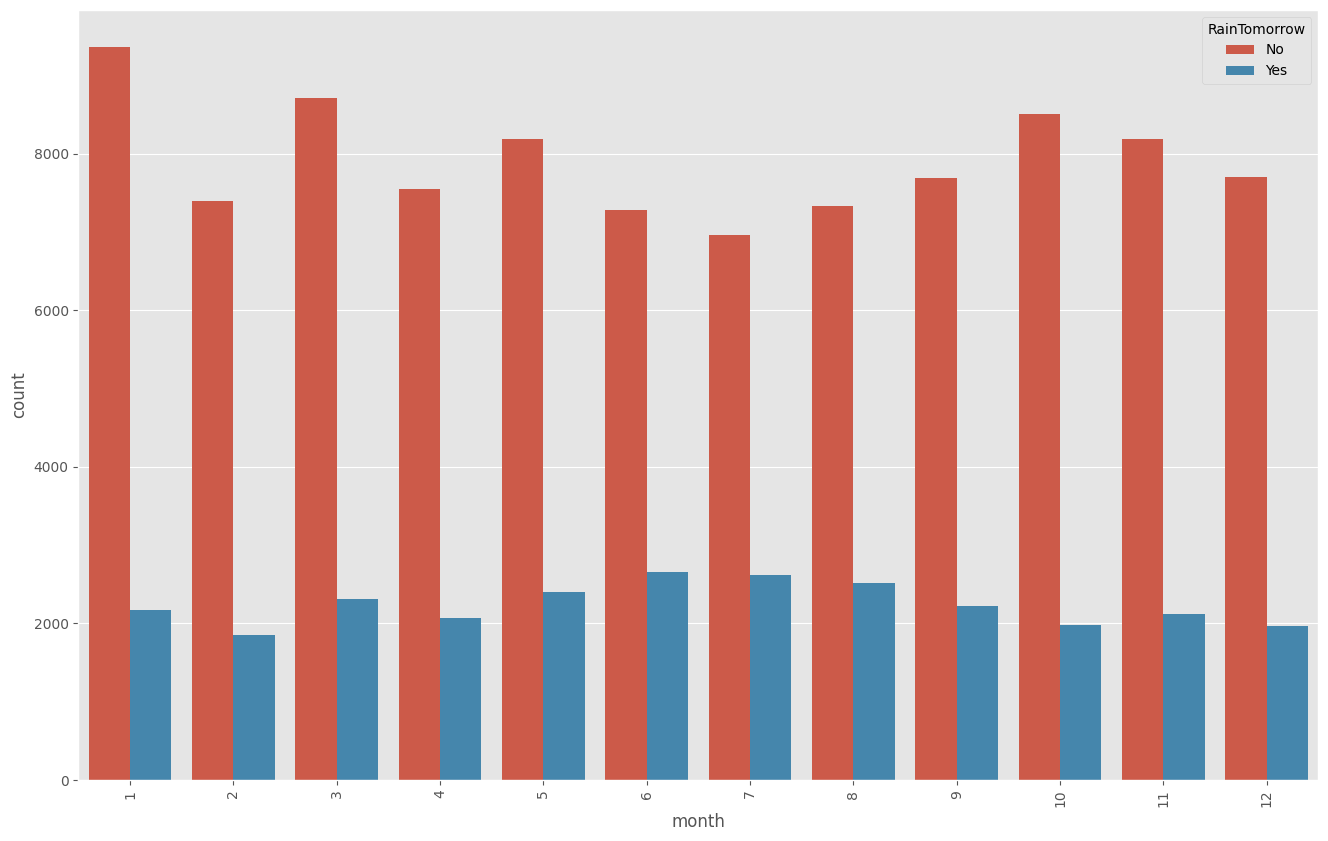

In [80]:
for col in df.select_dtypes(include=['int']):
    plt.figure(figsize = (16,10))
    ax = sns.countplot(data=df, x=col,hue=df['RainTomorrow'])  
    plt.xticks(rotation=90)
    plt.show       

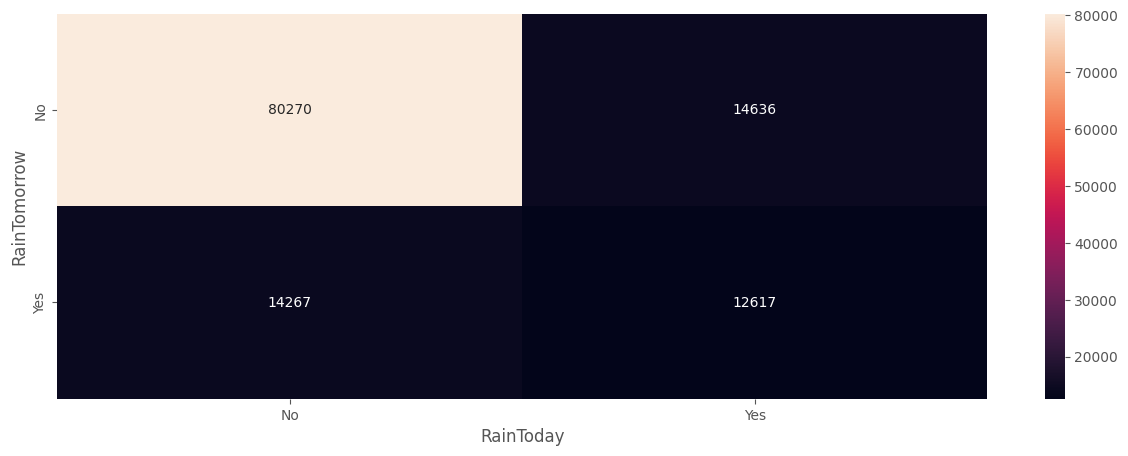

In [82]:
for col in df.select_dtypes(include=['object']):
    if len(df[col].unique()) <4 :
        if col != 'RainTomorrow' :
            plt.figure(figsize=(15,5))
            sns.heatmap(pd.crosstab(df['RainTomorrow'],df[col]), annot=True, fmt='d')      

- - Relation Column/Column : (very usefull)

C:\Users\Farouq MOUSMI\AppData\Local\Temp\ipykernel_14316\1756345828.py:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Farouq MOUSMI\AppData\Local\Temp\ipykernel_14316\1756345828.py:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Farouq MOUSMI\AppData\Local\Temp\ipykernel_14316\1756345828.py:7: UserW

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

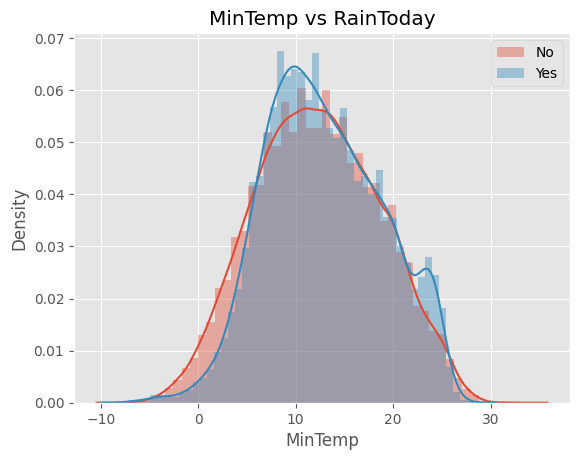

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

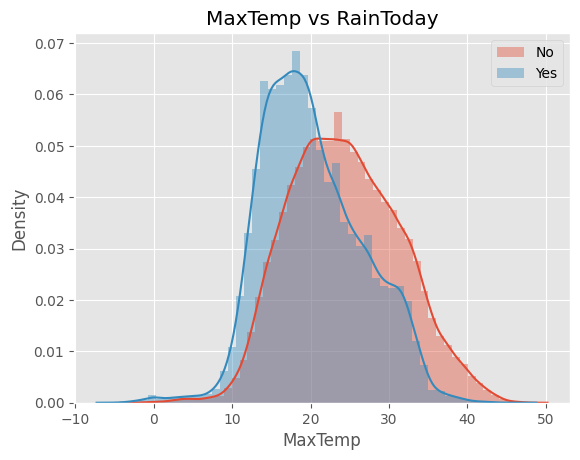

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

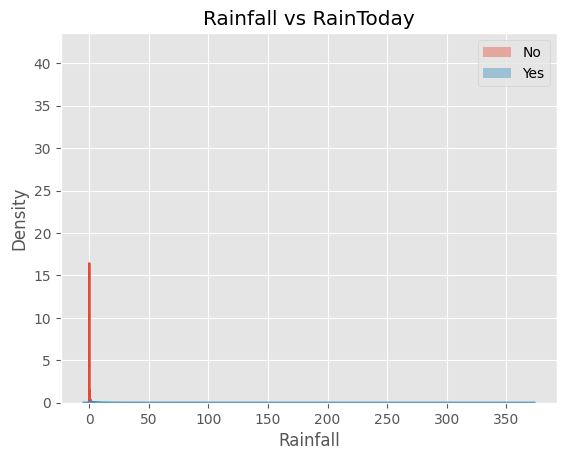

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

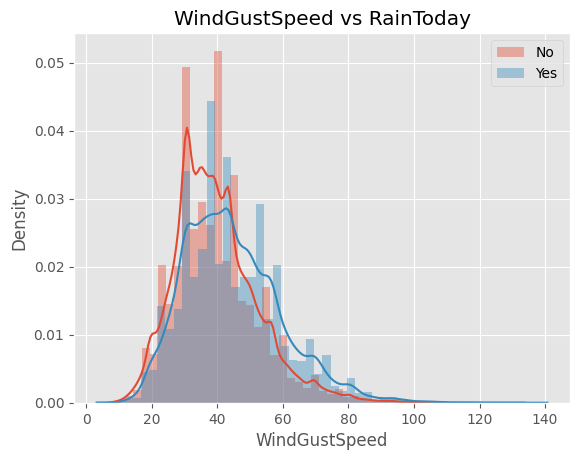

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

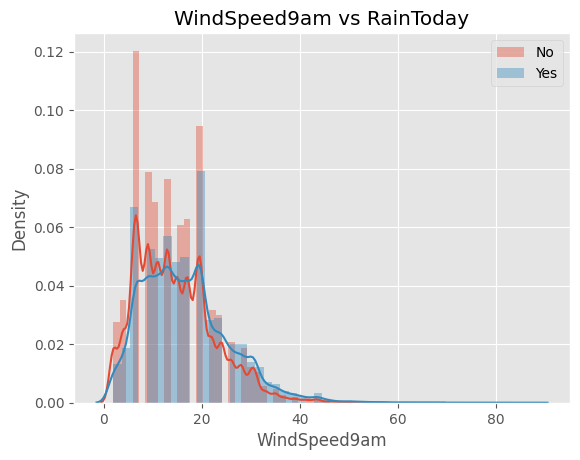

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

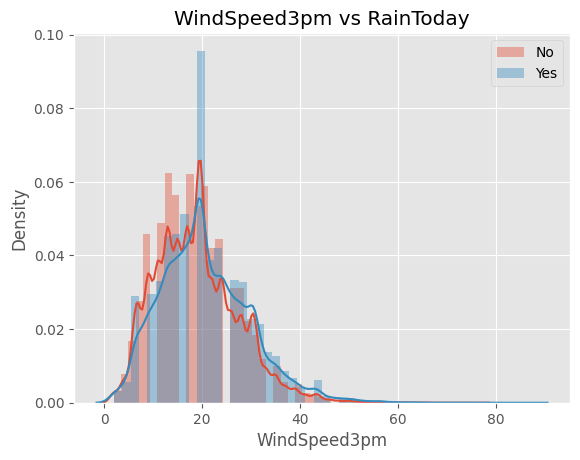

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

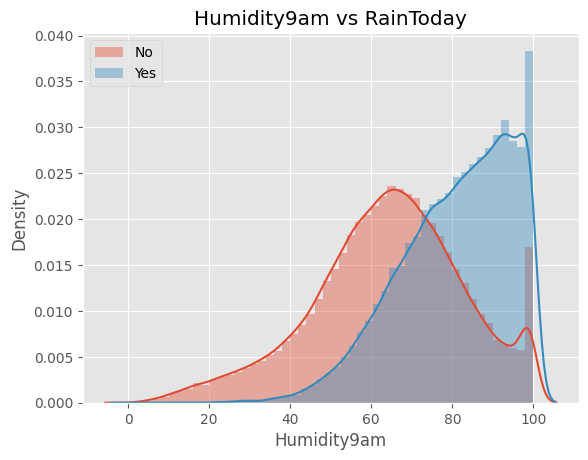

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

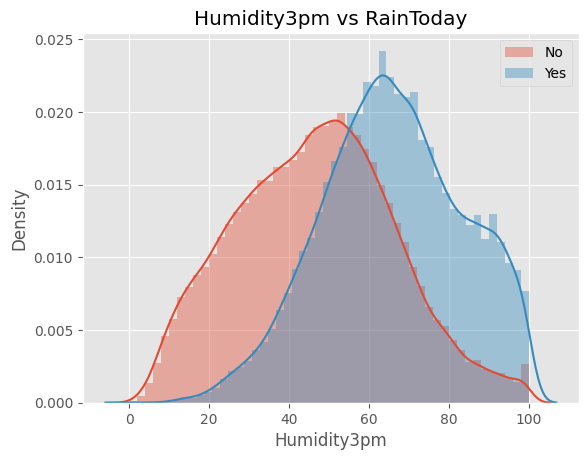

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

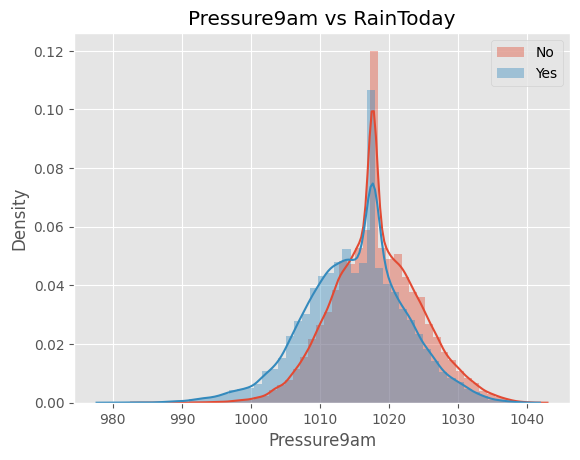

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

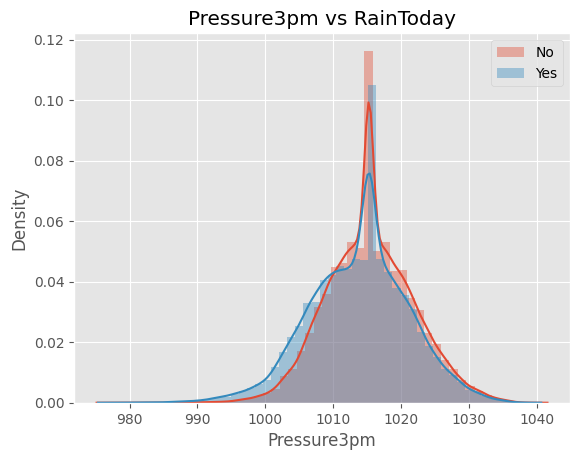

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

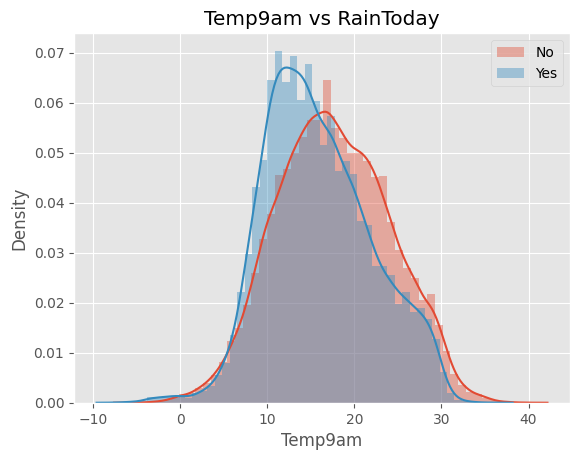

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

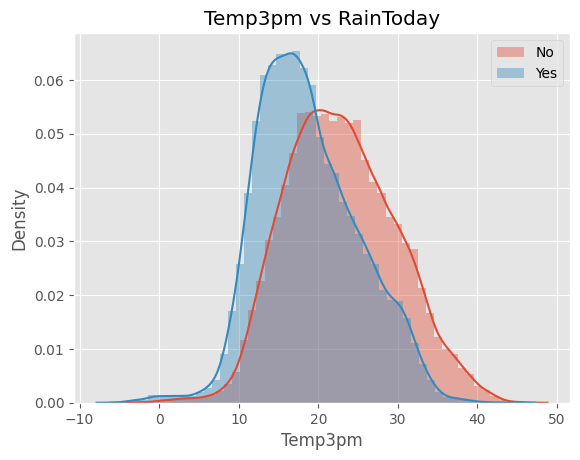

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

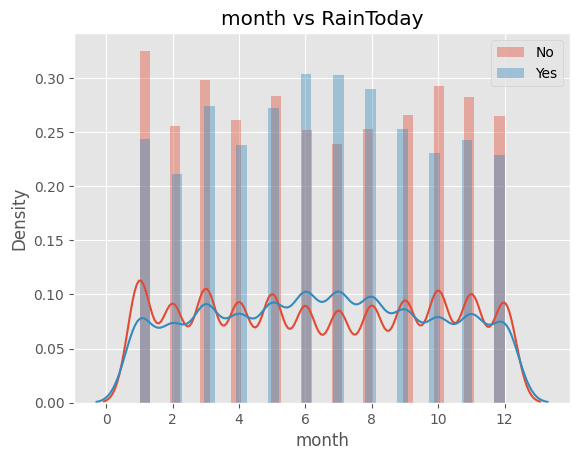

<Figure size 640x480 with 0 Axes>

In [89]:
for col in df.select_dtypes(include=['float','int']):           
    for col2 in df.select_dtypes(include=['object']):
        plt.figure() 
        if len(df[col2].unique()) <4 and col != 'RainTomorrow' and col2 != 'RainTomorrow' :
            for cat in df[col2].unique():
                #Data_A=Data[Data['column_y']==A]
                sns.distplot(df[df[col2]==cat][col],kde=True,label=cat).set(title=str(col) +" vs " + str(col2))
            plt.legend()

# [Step 5: Analyse Hypothese]()<a id="6"></a> <br>
- - Rate of 'RainTomorrow' depending to each col => prove if the rate of 'column_y' are not equal

In [95]:
df.drop(['Date','month'], axis=1, inplace=True)

KeyError: "['Date', 'month'] not found in axis"

In [96]:
from scipy.stats import ttest_ind                                                            
def t_test(col):
    alpha=0.02
    #=>array[True, False]           
    index_A=df['RainTomorrow']=="No"
    index_B=df['RainTomorrow']=="Yes"    
    #=>Data_A=Data[rows['column_y']==A] 
    if pd.api.types.is_numeric_dtype(df[col]):
        Data_A = df[index_A]
        Data_B = df[index_B]
        # dropna for eliminating NaN values for the test
        stat, p = ttest_ind(Data_A[col].dropna(), Data_B[col].dropna())                           
        if p < alpha:
            return 'H0 Rejetée'  # col has a rate not equal for 'column_y' => col has an impact on column_y
        else:
            return 'H0 Non Rejetée'  # col has no significant impact on column_y
    else:
        return 'Not Numeric'  # The column is not numeric   

for col in df.columns:
    print(f'{col :-<50} {t_test(col)}')

Location------------------------------------------ Not Numeric
MinTemp------------------------------------------- H0 Rejetée
MaxTemp------------------------------------------- H0 Rejetée
Rainfall------------------------------------------ H0 Rejetée
WindGustDir--------------------------------------- Not Numeric
WindGustSpeed------------------------------------- H0 Rejetée
WindDir9am---------------------------------------- Not Numeric
WindDir3pm---------------------------------------- Not Numeric
WindSpeed9am-------------------------------------- H0 Rejetée
WindSpeed3pm-------------------------------------- H0 Rejetée
Humidity9am--------------------------------------- H0 Rejetée
Humidity3pm--------------------------------------- H0 Rejetée
Pressure9am--------------------------------------- H0 Rejetée
Pressure3pm--------------------------------------- H0 Rejetée
Temp9am------------------------------------------- H0 Rejetée
Temp3pm------------------------------------------- H0 Rejetée
Rain

# [Step 6 : Data Cleaning]()<a id="7"></a> <br>

- Encodage : (Only for object column)

In [99]:
from sklearn.preprocessing import LabelEncoder
def encodage(data):
    cod_dict = {}
    for col in data.select_dtypes('object'):
        cod_dict[col] = LabelEncoder()
        print(cod_dict.keys())
        print('classed found : ' , list(cod_dict[col].fit(data[col]).classes_))
        #Create a label (category) encoder object
        data[col] = cod_dict[col].fit_transform(data[col])
        print('Updates dataframe is : \n' ,data )
    #for inverse transform not important
    # data['score0'] = cod_dict['score0'].inverse_transform(data['score0'])         
    # print('Inverse Transform  : \n' ,data)
    return data

- - Train_test_split

<Axes: title={'center': 'Data_test'}, ylabel='count'>

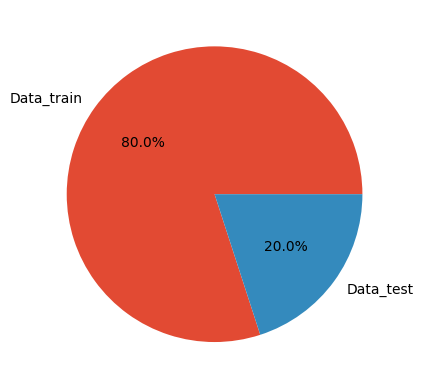

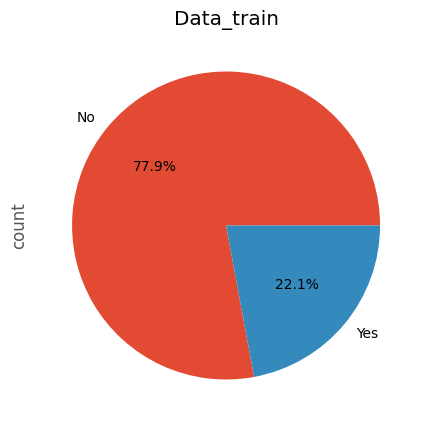

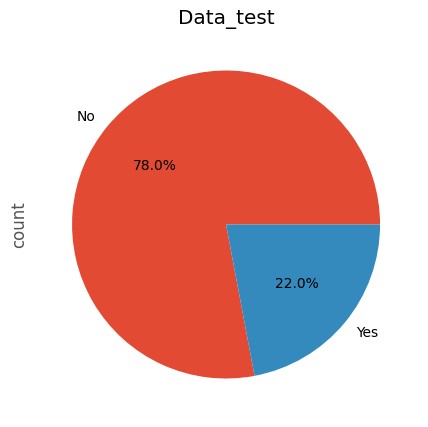

In [100]:
from sklearn.model_selection import train_test_split
Data_train , Data_test = train_test_split(df, test_size=0.2, random_state=0)
#chek if train_size==1-0.2 of all rows
plt.pie((Data_train.shape[0],Data_test.shape[0]), labels=('Data_train', 'Data_test'), autopct='%1.1f%%')
################################################(use it only for object target class )
#chek train['column_y'] class equilibre or not
plt.figure(figsize=(15,5))
plt.title('Data_train')
Data_train['RainTomorrow'].value_counts().plot.pie(autopct='%1.1f%%')
#chek test['column_y'] class equilibre or not
plt.figure(figsize=(15,5))
plt.title('Data_test')
Data_test['RainTomorrow'].value_counts().plot.pie(autopct='%1.1f%%')

In [101]:
from sklearn.preprocessing import StandardScaler
def prep(data):
    # only for column object use it
    data = encodage(data)
    # alwayse use it
    X = data.drop('RainTomorrow',axis=1)
    y = data['RainTomorrow']
    # only for target classification
    print(y.value_counts())
    return X,y

dict_keys(['Location'])
classed found :  ['Adelaide', 'Albury', 'AliceSprings', 'BadgerysCreek', 'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar', 'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart', 'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport', 'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF', 'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale', 'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville', 'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia', 'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera']
Updates dataframe is : 
         Location  MinTemp  MaxTemp  Rainfall WindGustDir  WindGustSpeed  \
19592         24     17.0     20.8       4.4         ESE           46.0   
87269          7     24.6     29.9     121.6           S           22.0   
139398        12     26.1     34.9       0.0           S           26.0   
114777        27      2.0     18.1  

<Axes: title={'center': 'Data_test'}, ylabel='count'>

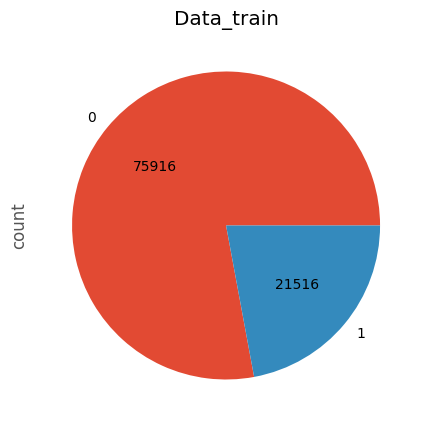

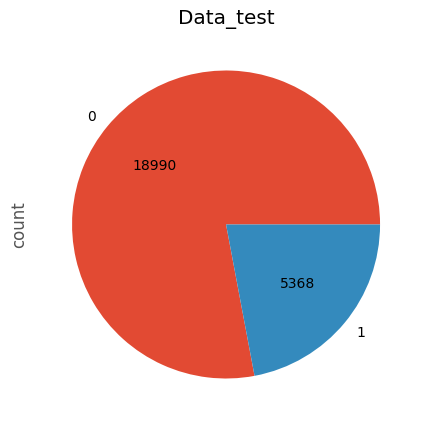

In [102]:
X_train, y_train = prep(Data_train)
X_test, y_test = prep(Data_test)

#check nbr of row y_train['column_y'] after elimin nan
plt.figure(figsize=(15,5))
plt.title('Data_train')
y_train.value_counts().plot.pie(
    autopct=lambda p:f'{p*sum(y_train.value_counts())/100 :.0f}')
#check nbr of row y_test['column_y'] after elimin nan
plt.figure(figsize=(15,5))
plt.title('Data_test')
y_test.value_counts().plot.pie(
    autopct=lambda p:f'{p*sum(y_test.value_counts())/100 :.0f}')

# [Step 7: Model Building (If Applicable):]()<a id="8"></a> <br>

- Train the model

In [103]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [106]:
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

# [Step 8: Model Evaluation:]()<a id="9"></a> <br>
- Evaluate the model's performance on the testing set using relevant metrics.

In [107]:
score = model.score(X_test,y_test)
print(score)
y_pred = model.predict(X_test)

0.8611544461778471


accuracy_score :  0.8611544461778471
confusion_matrix :  [[17968  1022]
 [ 2360  3008]]
f1_score :  0.8611544461778471
classification_report :                precision    recall  f1-score   support

           0       0.88      0.95      0.91     18990
           1       0.75      0.56      0.64      5368

    accuracy                           0.86     24358
   macro avg       0.82      0.75      0.78     24358
weighted avg       0.85      0.86      0.85     24358

recall_score :  [0.9461822  0.56035768]
precision_score :  [0.88390397 0.74640199]


<Axes: >

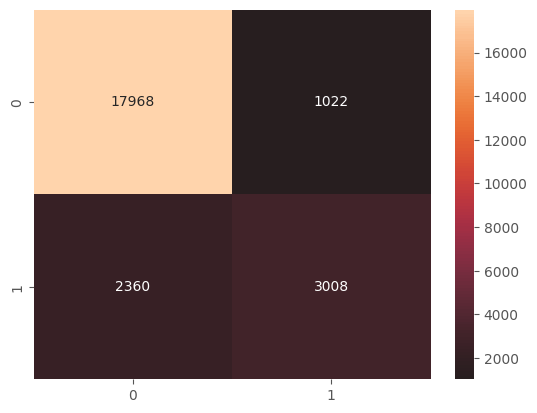

In [108]:
from sklearn.metrics import precision_score, accuracy_score,confusion_matrix, f1_score, recall_score, precision_recall_curve, classification_report

def scoring(y_test,y_pred):
    # Accuracy : acc= -((y-y_pred)**2/(y-y_mean)**2)  #this model describe in % the variation of y
    acc=accuracy_score(y_test, y_pred)        

    #best score is with Diagonal matrix   #visualisation of result               [[TP FP]
    cm = confusion_matrix(y_test, y_pred)                                        #[FN TN]]        

    # F1 Score : 2*(precision*recall)/(precision +recall) #average= can be : None,binary,micro,weighted,samples
    f1 = f1_score(y_test, y_pred, average='micro')         

    # Classification report :    #get (accuracy acc, score f1, cm)
    cr = classification_report(y_test,y_pred)

    # Recall Score : (Sensitivity) (TP / float(TP + FN)) == 1/1+2  #average= can be : None,binary,macro,weighted,samples
    rs = recall_score(y_test, y_pred, average=None)        

    # Precision Score : (Specificity) (TP / float(TP + FP))
    ps = precision_score(y_test, y_pred, average=None)
    return acc,cm,f1,cr,rs,ps
#compare (accuracy acc, score f1, cm)
scoring(y_test,y_pred)              
print("accuracy_score : " , scoring(y_test,y_pred)[0])
print("confusion_matrix : ",  scoring(y_test,y_pred)[1] )
print("f1_score : " , scoring(y_test,y_pred)[2] )
print("classification_report : " , scoring(y_test,y_pred)[3] )
print("recall_score : " , scoring(y_test,y_pred)[4] )
print("precision_score : " , scoring(y_test,y_pred)[5] )
#visualisation of result : best score is with Diagonal matrix
cm = scoring(y_test,y_pred)[1] 
sns.heatmap(cm, center=True, annot=True, fmt="d")  